### **NAME - MAHAMADH SHAMIR**
###       shamirmahamadh@gmail.com 

### **Simple linear regression **

**1)Delivery_time -> Predict delivery time using sorting time**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving delivery.csv to delivery.csv


In [ ]:
df=pd.read_csv('delivery.csv')
df

,Deliverytime,Sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


**EDA and Visualisation**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


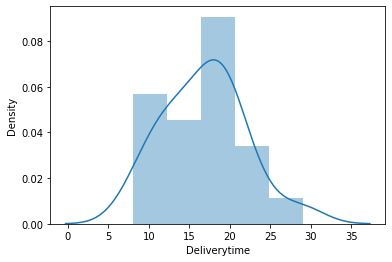

In [ ]:
sns.distplot(df['Deliverytime'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


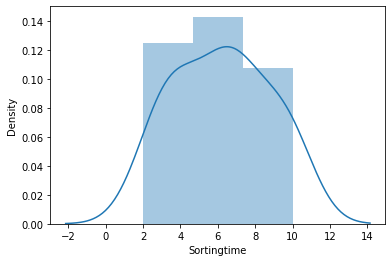

In [ ]:
sns.distplot(df['Sortingtime'])

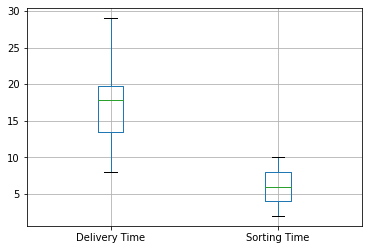

In [ ]:
df.boxplot()

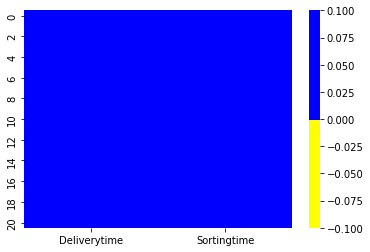

In [ ]:
import seaborn as sns
cols = df.columns 
colours = ['yellow', 'blue'] 
sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colours))

### **Correlation**

In [ ]:
cor=df.corr()
cor

,Deliverytime,Sortingtime
Deliverytime,1.000000,0.825997
Sortingtime,0.825997,1.000000


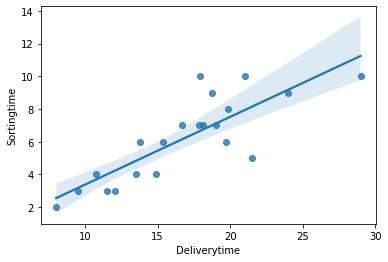

In [ ]:
sns.regplot(x=df['Deliverytime'],y=df['Sortingtime'])

### **Model Building**

In [ ]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [ ]:
dataset=pd.DataFrame(df)
dataset

,Deliverytime,Sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
model1= smf.ols("	Deliverytime~Sortingtime",data = dataset).fit()

In [ ]:
model.params

Intercept      6.582734
Sortingtime    1.649020
dtype: float64

In [ ]:
model.tvalues, model.pvalues

(Intercept      3.823349
 Sortingtime    6.387447
 dtype: float64, Intercept      0.001147
 Sortingtime    0.000004
 dtype: float64)

In [ ]:
model.rsquared ,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        15:02:49   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
Sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2= smf.ols("	np.log(Deliverytime)~Sortingtime",data = dataset).fit()
model2

In [ ]:
model2.params

Intercept      2.121372
Sortingtime    0.105552
dtype: float64

In [ ]:
model2.tvalues,model2.pvalues

(Intercept      20.601357
 Sortingtime     6.836088
 dtype: float64, Intercept      1.857343e-14
 Sortingtime    1.592708e-06
 dtype: float64)

In [ ]:
model2.rsquared,model2.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Deliverytime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Sat, 14 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                          15:10:09   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
Sortingtime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model3= smf.ols("	np.log(Deliverytime)~np.log(Sortingtime)",data = dataset).fit()

In [ ]:
model3.params

Intercept              1.741987
np.log(Sortingtime)    0.597522
dtype: float64

In [ ]:
model3.tvalues,model3.pvalues

(Intercept              13.085552
 np.log(Sortingtime)     8.024484
 dtype: float64, Intercept              5.921137e-11
 np.log(Sortingtime)    1.601539e-07
 dtype: float64)

In [ ]:
model3.rsquared,model3.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Deliverytime)   R-squared:                       0.772
Model:                              OLS   Adj. R-squared:                  0.760
Method:                   Least Squares   F-statistic:                     64.39
Date:                  Sat, 14 Jan 2023   Prob (F-statistic):           1.60e-07
Time:                          15:12:42   Log-Likelihood:                 10.291
No. Observations:                    21   AIC:                            -16.58
Df Residuals:                        19   BIC:                            -14.49
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sortingtime)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model Prediction

In [ ]:
# model_1 has the R-squared:	0.682 which is considered to be a good model and the predition are made from 
# model_1
#X=input('Enter the sorting time')
X=int(input('Enter the sorting time:'))
newtime=pd.Series([X])
df_pred=pd.DataFrame(newtime,columns=["Sortingtime"])
Y=model_1.predict(df_pred)
print("the delivery time :",Y)


Enter the sorting time:20
the delivery time : 0    39.563132
dtype: float64


**2)SALARY HIKE PREDECTION**






In [ ]:
from google.colab import files
uploaded=files.upload()


Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
sal=pd.read_csv('Salary_Data.csv')
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
sal[sal.duplicated()].shape

(0, 2)

EDA and VIS

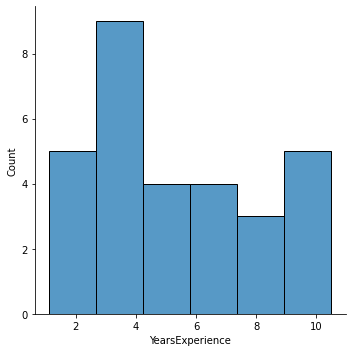

In [ ]:
sns.displot(sal['YearsExperience'])

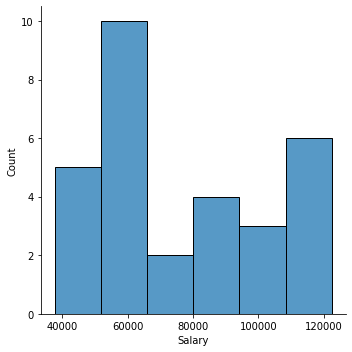

In [ ]:
sns.displot(sal['Salary'])

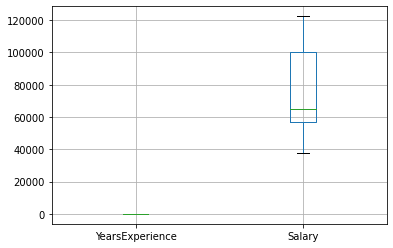

In [ ]:
sal.boxplot()

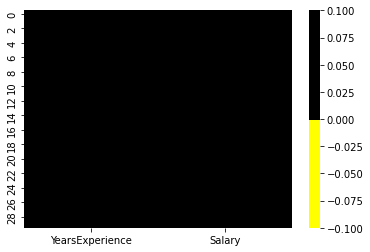

In [ ]:
import seaborn as sns
cols = sal.columns 
colours = ['yellow', 'black'] 
sns.heatmap(sal[cols].isnull(),
            cmap=sns.color_palette(colours))

**Correlation**

In [ ]:
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


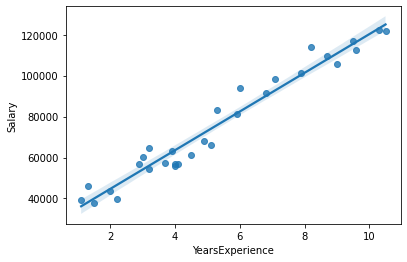

In [ ]:
sns.regplot(x=sal['YearsExperience'],y=sal['Salary'])


**MODEL**

In [ ]:
model_1 = smf.ols('Salary~YearsExperience',data=sal).fit()

In [ ]:
model_1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
model_1.tvalues,model_1.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [ ]:
model_1.rsquared,model_1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [ ]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        17:15:29   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_2 = smf.ols('np.log(Salary)~YearsExperience',data=sal).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        17:15:51   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_2.tvalues,model_2.pvalues

(Intercept                   2.895135
 np.log(YearsExperience)    12.791989
 dtype: float64, Intercept                  7.268813e-03
 np.log(YearsExperience)    3.250155e-13
 dtype: float64)

In [ ]:
model_2.rsquared,model_2.rsquared_adj

(0.853888882875697, 0.8486706286926862)

In [ ]:
model_3 = smf.ols('Salary~np.log(YearsExperience)',data=sal).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        17:18:51   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_3.tvalues,model_3.pvalues

(Intercept                   2.895135
 np.log(YearsExperience)    12.791989
 dtype: float64, Intercept                  7.268813e-03
 np.log(YearsExperience)    3.250155e-13
 dtype: float64)

In [ ]:
model_3.rsquared,model_3.rsquared_adj

(0.853888882875697, 0.8486706286926862)

**PREDICTION**

In [ ]:
#model_1 has the r squred 	0.932 , it is considered as good model and used for preditiction
#model_1
model_1.summary()
A=float(input('enter the experice:'))
newsal=pd.Series([A])
sal_pred=pd.DataFrame(newsal,columns=['YearsExperience'])
Y=model_1.predict(sal_pred)
print("the salary:",Y)

enter the experice:10
the salary: 0    11.761931
dtype: float64
